In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

ModuleNotFoundError: No module named 'yfinance'

In [ ]:
df = pd.DataFrame()

#stks = ['MSFT', 'DUK', 'UNH', 'XOM', 'COST','AAPL','GOOG','NIO','WBD','INTC', 'BAC','SPY']

stks = ['MSFT', 'DUK', 'UNH', 'XOM', 'COST','SPY']

for stk in stks:
    market_data = yf.download(stk, start='2020-01-01', end='2022-12-31', interval='1d')
    df[stk] = market_data["Adj Close"]
    # Set the index to a datetime object
    

    # Display the last five rows
df.index = pd.to_datetime(market_data.index)
df.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,MSFT,DUK,UNH,XOM,COST,SPY
Date,,,,,,
2022-12-23,236.631805,98.644386,525.215271,105.091942,459.172852,378.706665
2022-12-27,234.877380,99.295692,525.887512,106.552094,455.054047,377.213226
2022-12-28,232.468719,98.558182,522.388123,104.801842,449.585449,372.525269
2022-12-29,238.891769,99.458519,523.801697,105.594772,453.098877,379.230835
2022-12-30,237.712234,98.644386,524.098267,106.658455,453.069092,378.231934


In [ ]:
df.to_csv('price.csv', index = False)

In [ ]:
df_diff = df.diff().dropna()
print(df_diff.shape)
df_diff.tail()

(755, 6)


,MSFT,DUK,UNH,XOM,COST,SPY
Date,,,,,,
2022-12-23,0.535263,0.996117,4.171509,2.707558,3.910370,2.165985
2022-12-27,-1.754425,0.651306,0.672241,1.460152,-4.118805,-1.493439
2022-12-28,-2.408661,-0.737511,-3.499390,-1.750252,-5.468597,-4.687958
2022-12-29,6.423050,0.900337,1.413574,0.792931,3.513428,6.705566
2022-12-30,-1.179535,-0.814133,0.296570,1.063683,-0.029785,-0.998901


## $\beta$ calculation.  <br> 
$\beta_i = \frac{\text{Cov}(R_{i,\tilde{t}}, R_{mkt, \tilde{t}})}{\text{Var}(R_{mkt, \tilde{t}})}$ where, $R_{i,\tilde{t}}$ and $R_{mkt, \tilde{t}}$ are raw returns of stock $i$ and benchmark market during the time window $\tilde{t}$, repectively.

In [ ]:
beta_df = pd.DataFrame()

beta_wdw = 60

df_var = df_diff['SPY'].rolling(beta_wdw).var().dropna()

for stk in stks[:-1]:
    df_cov = df_diff[[stk, 'SPY']].rolling(beta_wdw).cov().dropna().unstack()[stk]['SPY']
    betas = (df_cov/(df_var))
    beta_df[stk+'_beta'] = betas
    
print(beta_df.shape)

(696, 5)


<Axes: >

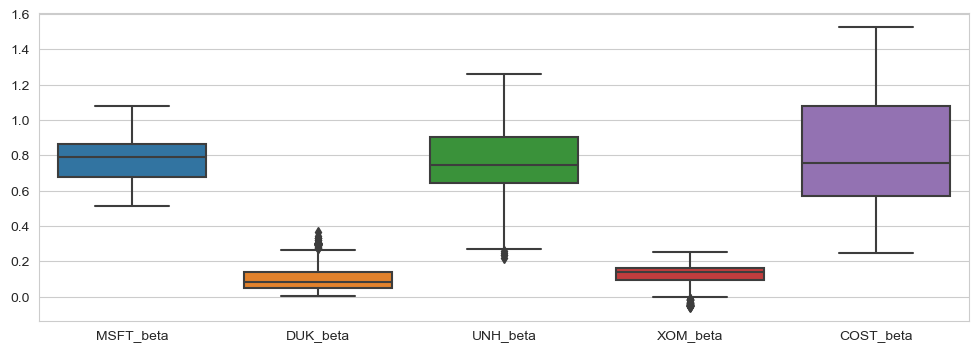

In [ ]:
plt.figure(figsize = (12,4))
sns.boxplot(data=beta_df)

In [ ]:
df1 = df_diff.join(beta_df, how = 'inner')
print(df1.shape)
df1.head()

(696, 11)


,MSFT,DUK,UNH,XOM,COST,SPY,MSFT_beta,DUK_beta,UNH_beta,XOM_beta,COST_beta
Date,,,,,,,,,,,
2020-03-30,10.174805,2.804665,8.397461,0.452684,6.432892,7.805023,0.697443,0.288716,1.202248,0.143639,0.746432
2020-03-31,-2.434998,-2.212852,-1.806931,0.386827,-5.674957,-3.698608,0.697471,0.289638,1.200877,0.142982,0.748882
2020-04-01,-5.411102,-2.838959,-11.469208,-0.362144,1.563202,-11.001099,0.694777,0.289324,1.198516,0.139632,0.730822
2020-04-02,3.043747,1.560989,2.967148,2.362173,4.452850,5.386780,0.692938,0.289120,1.193095,0.142169,0.730466
2020-04-03,-1.381790,-2.890419,-10.413605,-0.979439,-2.681213,-3.452057,0.692473,0.290403,1.194401,0.142778,0.730247


## Residual calculation

$R^{res}_{i,t}=R_{i,t}-\beta_i R_{mkt,t}$

In [ ]:
res_df = pd.DataFrame()
for stk in stks[:-1]:
    res_df[stk] = df1[stk]-df1[stk+"_beta"]*df1["SPY"]
    
print(res_df.shape)

(696, 5)


In [ ]:
res_df

,MSFT,DUK,UNH,XOM,COST
Date,,,,,
2020-03-30,4.740785,0.557557,-0.986244,-0.674554,0.606991
2020-03-31,0.145022,-1.154786,2.634712,0.924052,-2.905202
2020-04-01,2.236735,0.347879,1.715769,1.184689,9.603140
2020-04-02,-0.690405,0.003637,-3.459812,1.610939,0.517927
2020-04-03,1.010787,-1.909776,-6.290390,-0.490989,-0.160310
...,...,...,...,...,...
2022-12-23,-1.461522,0.658913,2.723551,2.286536,1.544425
2022-12-27,-0.376775,0.893065,1.667656,1.776821,-2.484839
2022-12-28,1.907407,-0.022812,-0.451711,-0.849662,-0.257323


## Correlation matrix calcuation

We construct a correlation matrix using market residual returns matrix above. However, we should construct them with a rollwing window of size $w$ (look back days). For preliminary setup we construct one correlation matrix with first five days ($w=5$). 

In [ ]:
w = 5
res_df[0:w].corr()

,MSFT,DUK,UNH,XOM,COST
MSFT,1.000000,0.505384,0.162949,-0.667949,0.299742
DUK,0.505384,1.000000,0.400930,0.232365,0.531176
UNH,0.162949,0.400930,1.000000,0.389519,0.247123
XOM,-0.667949,0.232365,0.389519,1.000000,0.270885
COST,0.299742,0.531176,0.247123,0.270885,1.000000


## 1) Spectral clustering method (the simplest approach in the article)

Note this method does not conside the signs of the correlation matrix (unsigned spectral clustering algorithm).

Consider the absolute correlation matrix as the graph adjacency matrix $A = |Corr(res\_df)|$ and the graph deree matrix to be the diagonal matrix $D_{ii} = \sum_{i=1}^{n}A_{ij}$. Laplacian matrix $L=D-A$.

In [ ]:
A = abs(res_df[0:w].corr().values)
A

array([[1.        , 0.50538362, 0.16294922, 0.66794875, 0.29974232],
       [0.50538362, 1.        , 0.40093033, 0.23236536, 0.5311758 ],
       [0.16294922, 0.40093033, 1.        , 0.38951934, 0.24712316],
       [0.66794875, 0.23236536, 0.38951934, 1.        , 0.27088466],
       [0.29974232, 0.5311758 , 0.24712316, 0.27088466, 1.        ]])

In [ ]:
D = np.diag(A.sum(axis=1))
D

array([[2.63602391, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 2.6698551 , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 2.20052205, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 2.5607181 , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 2.34892593]])

In [ ]:
L = D - A
L

array([[ 1.63602391, -0.50538362, -0.16294922, -0.66794875, -0.29974232],
       [-0.50538362,  1.6698551 , -0.40093033, -0.23236536, -0.5311758 ],
       [-0.16294922, -0.40093033,  1.20052205, -0.38951934, -0.24712316],
       [-0.66794875, -0.23236536, -0.38951934,  1.5607181 , -0.27088466],
       [-0.29974232, -0.5311758 , -0.24712316, -0.27088466,  1.34892593]])

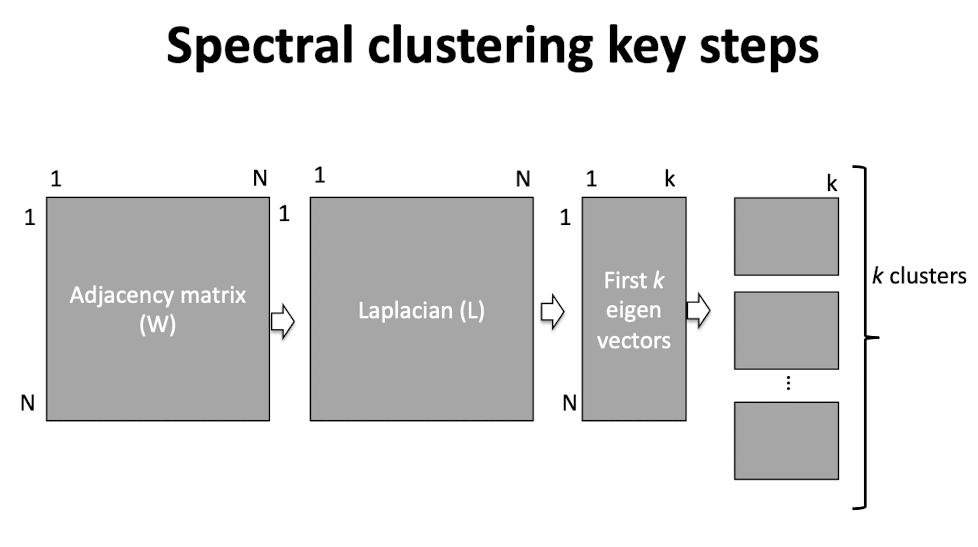

In [ ]:
from numpy import linalg as LA

In [ ]:
eigenvalues, eigenvectors = LA.eig(L)

In [ ]:
eigenvalues

array([4.44089210e-16, 2.42301749e+00, 2.00919171e+00, 1.53793259e+00,
       1.44590332e+00])

In [ ]:
eigenvectors

array([[ 0.4472136 ,  0.65503083,  0.27996642,  0.41571195,  0.34603034],
       [ 0.4472136 , -0.49279287,  0.69191033, -0.25906916,  0.10629417],
       [ 0.4472136 ,  0.20925478, -0.03235282, -0.06790465, -0.86634559],
       [ 0.4472136 , -0.51384606, -0.45427683,  0.56862297,  0.0791373 ],
       [ 0.4472136 ,  0.14235332, -0.4852471 , -0.65736111,  0.33488379]])

In [ ]:
eigenvectors.shape

(5, 5)

In [ ]:
#number of clusters K
K = 2
X = eigenvectors[:,:K]
X

array([[ 0.4472136 ,  0.65503083],
       [ 0.4472136 , -0.49279287],
       [ 0.4472136 ,  0.20925478],
       [ 0.4472136 , -0.51384606],
       [ 0.4472136 ,  0.14235332]])

In [ ]:
from sklearn.cluster import \
     (KMeans,
      AgglomerativeClustering)
from scipy.cluster.hierarchy import \
     (dendrogram,
      cut_tree)
from ISLP.cluster import compute_linkage

In [ ]:
kmeans = KMeans(n_clusters=K,
                random_state=2,
                n_init=20).fit(X)

In [ ]:
kmeans.labels_

array([0, 1, 0, 1, 0], dtype=int32)

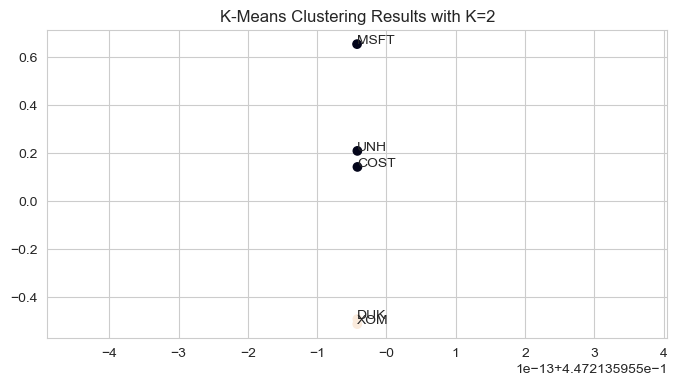

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_)
for i, label in enumerate(res_df.columns):
    plt.annotate(label, (X[:,0][i], X[:,1][i]))
ax.set_title("K-Means Clustering Results with K=2");

In [ ]:
df_clus = pd.DataFrame()
df_clus["stock"] = df.columns[:-1]
df_clus["clusters"] = kmeans.labels_

In [ ]:
df_clus.to_csv('clusters.csv', index = False)

## checking the behavior of winners and losers

In [ ]:
df[0:w]
#formed cluster on 2020-01-08 is [0, 1, 0, 1, 0]

,MSFT,DUK,UNH,XOM,COST,SPY
Date,,,,,,
2020-01-02,154.779526,77.624222,276.971954,57.528828,275.580139,306.295258
2020-01-03,152.852234,77.675797,274.168976,57.066322,275.807007,303.975952
2020-01-06,153.247345,78.053856,276.072296,57.504490,275.882629,305.135651
2020-01-07,151.850052,77.564079,274.405792,57.033878,275.447784,304.277679
2020-01-08,154.268768,77.675797,280.191345,56.173782,278.605469,305.899353


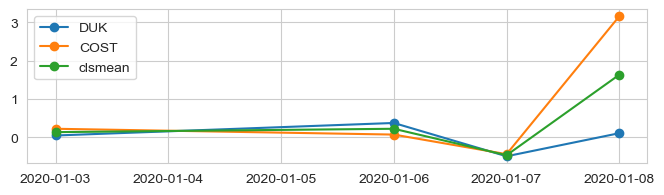

In [ ]:
plt.figure(figsize=(8,2))
cls1 = df[["DUK", "COST"]][0:w].diff().dropna()
cls1["clsmean"] = cls1[["DUK", "COST"]].apply(lambda x: x.mean(), axis=1)
plt.plot(cls1, '-o')
plt.legend(["DUK", "COST", "clsmean"])

In [ ]:
cls1

,DUK,COST,clsmean
Date,,,
2020-01-03,0.051575,0.226868,0.139221
2020-01-06,0.378059,0.075623,0.226841
2020-01-07,-0.489777,-0.434845,-0.462311
2020-01-08,0.111717,3.157684,1.634701


Scale of price may have an effect on the cluster mean since we do not consider the percentage changes but raw changes to calcuate the cluster mean. Whichever may have a large deviation could lead the cluster mean.

In this example COST make larger move on 2020-01-08 draging cluster mean towards it. This makes DUK a loser by a large deviation. So we go long on DUK expecting it will move towards the cluster mean in a certain period of time.

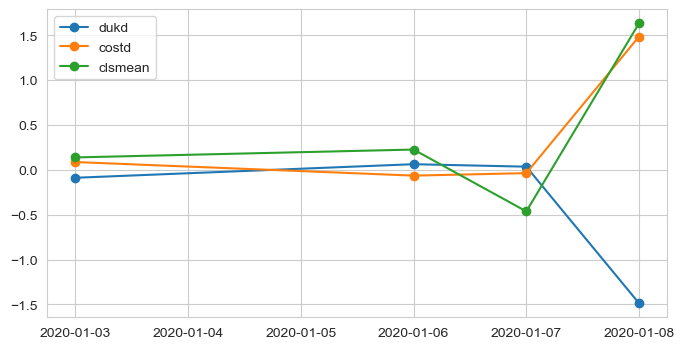

In [ ]:
plt.figure(figsize=(8,4))
cls1 = df[["DUK", "COST"]][0:w].diff().dropna()
cls1[["dukd", "costd"]] = cls1.apply(lambda x: x-x.mean(), axis=1).cumsum()
cls1["clsmean"] = cls1[["DUK", "COST"]].apply(lambda x: x.mean(), axis=1)
plt.plot(cls1[["dukd", "costd","clsmean"]], '-o')
plt.legend(["dukd", "costd", "clsmean"])

In [ ]:
cls1

,DUK,COST,dukd,costd,clsmean
Date,,,,,
2020-01-03,0.051575,0.226868,-0.087646,0.087646,0.139221
2020-01-06,0.378059,0.075623,0.063572,-0.063572,0.226841
2020-01-07,-0.489777,-0.434845,0.036106,-0.036106,-0.462311
2020-01-08,0.111717,3.157684,-1.486877,1.486877,1.634701


In [ ]:
#only for practicing
cls1.transform(lambda x: x.rank(ascending=False), axis=1)

,DUK,COST,clsmean
Date,,,
2020-01-03,3.0,1.0,2.0
2020-01-06,1.0,3.0,2.0
2020-01-07,3.0,1.0,2.0
2020-01-08,3.0,1.0,2.0


In [ ]:
cls1[["dukd", "costd"]].sum()

dukd    -1.486877
costd    1.486877
dtype: float64

In [ ]:
0.226868-(0.05157 + 0.226868)/2

0.087649